In [118]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from matplotlib import ticker as mtick
from sklearn import metrics

In [74]:
car_dataset = pd.read_csv('archive/car data.csv')

In [75]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [76]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [77]:
car_dataset.shape

(301, 9)

In [78]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [79]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

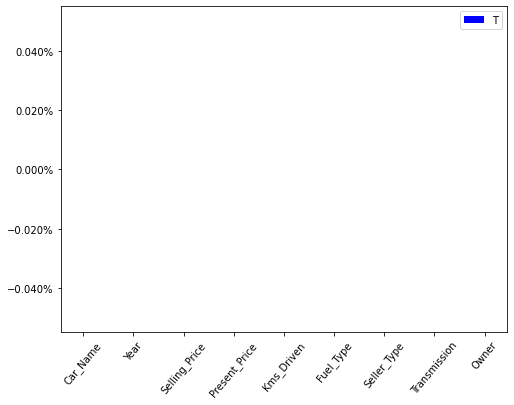

In [80]:
fig , ax = plt.subplots(1,1, figsize = (8,6))
(car_dataset.isnull().mean()*100).plot(kind= 'bar',ax=ax, align = 'center', width=.4, color = 'blue')
plt.legend(labels='Trainin data')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.tick_params(axis='x', labelrotation=50)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Car Selling Groph per Year')

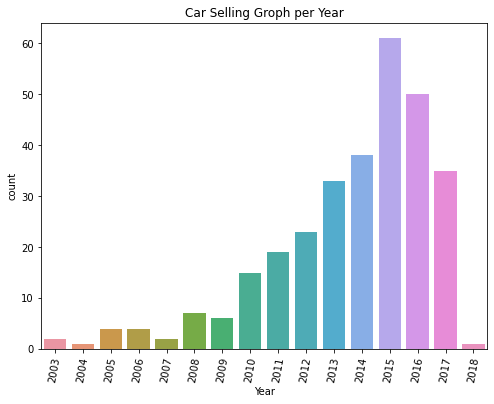

In [81]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
sns.countplot(car_dataset.Year)
ax.tick_params(axis='x', labelrotation=80)
plt.title('Car Selling Groph per Year')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Fuel Type')

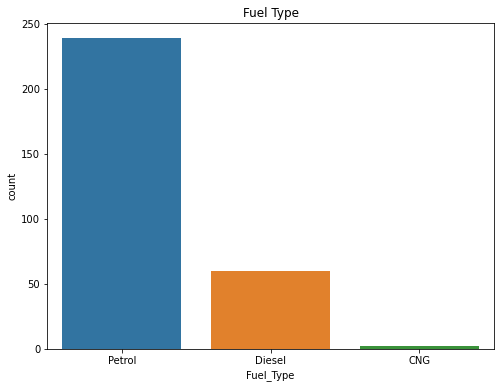

In [82]:

fig, ax = plt.subplots(1,1, figsize=(8,6))
sns.countplot(car_dataset.Fuel_Type)
plt.title('Fuel Type')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Seller_Type', ylabel='count'>

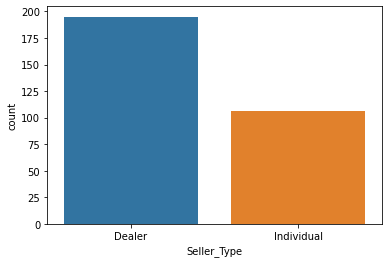

In [83]:
sns.countplot(car_dataset.Seller_Type)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transmission', ylabel='count'>

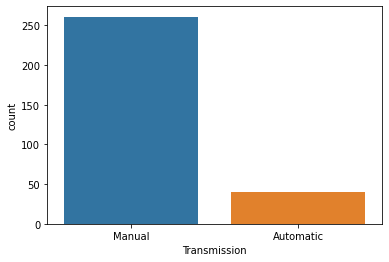

In [84]:
sns.countplot(car_dataset.Transmission)

In [85]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [93]:
#car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}}, inplace=True)
car_dataset = pd.get_dummies(car_dataset, columns=['Transmission'])
car_dataset = pd.get_dummies(car_dataset, columns=['Seller_Type'])
car_dataset = pd.get_dummies(car_dataset, columns=['Fuel_Type'])

KeyError: "None of [Index(['Transmission'], dtype='object')] are in the [columns]"

In [92]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,ritz,2014,3.35,5.59,27000,0,1,0,0,1,0,0,1
1,sx4,2013,4.75,9.54,43000,0,1,0,0,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,1,0,0,1,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,1,0,0,1,0,0,1
4,swift,2014,4.60,6.87,42450,0,1,0,0,1,0,1,0


In [94]:
car_dataset = car_dataset.drop([])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Car_Name                301 non-null    object 
 1   Year                    301 non-null    int64  
 2   Selling_Price           301 non-null    float64
 3   Present_Price           301 non-null    float64
 4   Kms_Driven              301 non-null    int64  
 5   Owner                   301 non-null    int64  
 6   Seller_Type_Dealer      301 non-null    uint8  
 7   Seller_Type_Individual  301 non-null    uint8  
 8   Transmission_Automatic  301 non-null    uint8  
 9   Transmission_Manual     301 non-null    uint8  
 10  Fuel_Type_CNG           301 non-null    uint8  
 11  Fuel_Type_Diesel        301 non-null    uint8  
 12  Fuel_Type_Petrol        301 non-null    uint8  
dtypes: float64(2), int64(3), object(1), uint8(7)
memory usage: 16.3+ KB


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


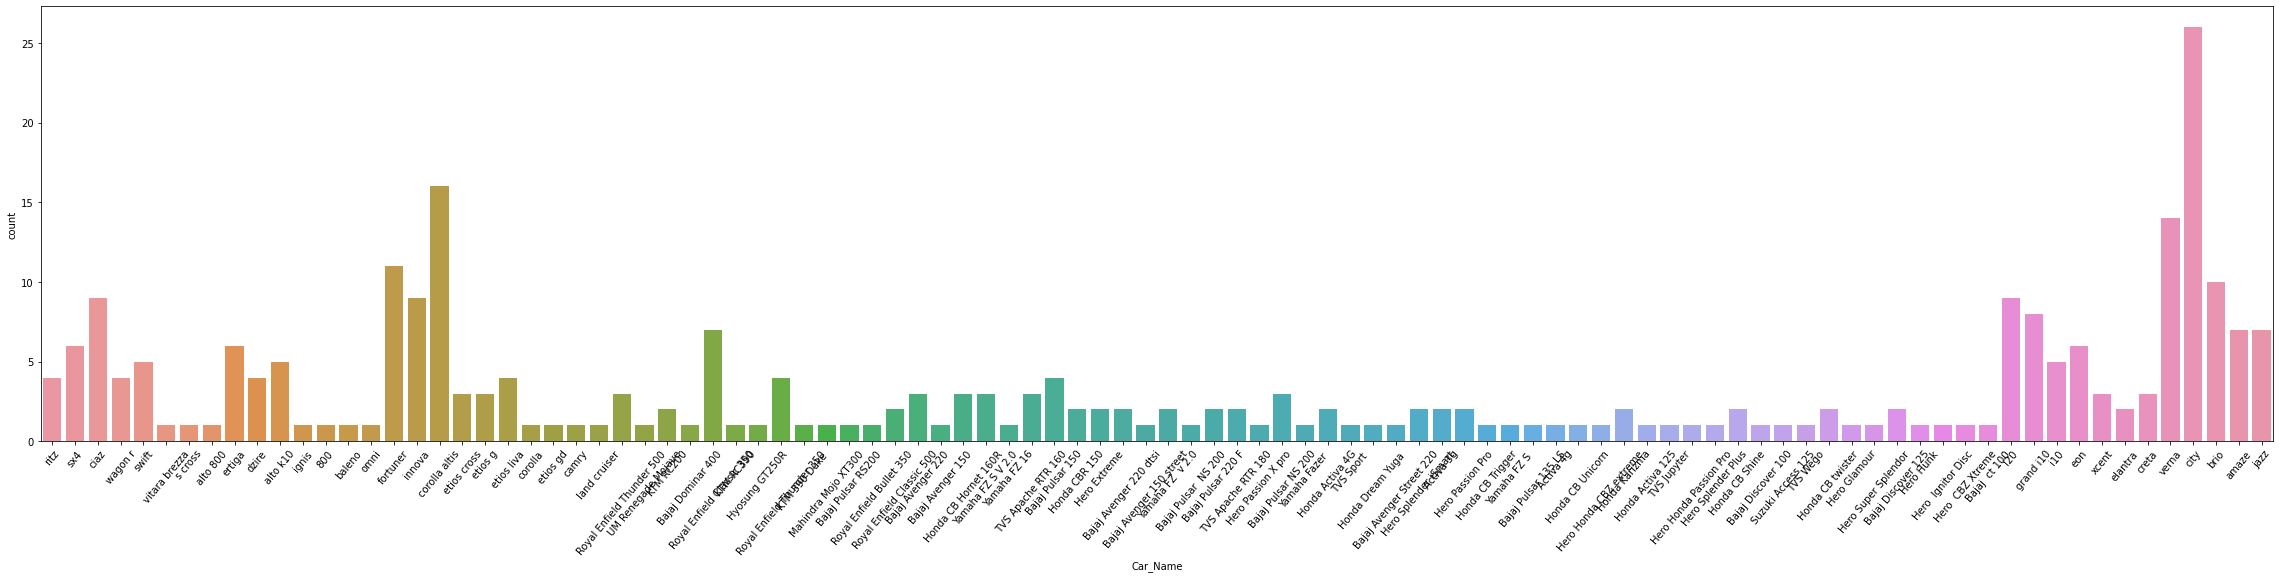

In [103]:
fig, ax = plt.subplots(1,1, figsize=(40,8))
sns.countplot(car_dataset.Car_Name)
ax.tick_params(axis='x', labelrotation = 50)

In [97]:
car_dataset.Car_Name.value_counts()

city                      26
corolla altis             16
verna                     14
fortuner                  11
brio                      10
                          ..
Honda CB Unicorn           1
Hero  Ignitor Disc         1
Bajaj Avenger 150          1
Hero Honda CBZ extreme     1
TVS Wego                   1
Name: Car_Name, Length: 98, dtype: int64

In [106]:
X = car_dataset.drop(['Car_Name','Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

In [107]:
X.head()

,Year,Present_Price,Kms_Driven,Owner,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,2014,5.59,27000,0,1,0,0,1,0,0,1
1,2013,9.54,43000,0,1,0,0,1,0,1,0
2,2017,9.85,6900,0,1,0,0,1,0,0,1
3,2011,4.15,5200,0,1,0,0,1,0,0,1
4,2014,6.87,42450,0,1,0,0,1,0,1,0


In [108]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [110]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [113]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((270, 11), (31, 11), (270,), (31,))

In [114]:
model = LinearRegression()

In [115]:
model.fit(X_train, Y_train)

LinearRegression()

In [123]:
train_prediction = model.predict(X_train)

In [124]:
error_escore = metrics.r2_score(Y_train, train_prediction)
error_escore

0.8826805250490876

<function matplotlib.pyplot.show(close=None, block=None)>

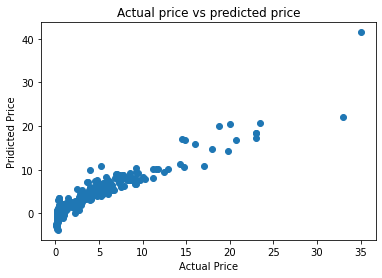

In [125]:
plt.scatter(Y_train, train_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Pridicted Price')
plt.title('Actual price vs predicted price')
plt.show

In [126]:
test_prediction = model.predict(X_test)

In [128]:
tes_pred_escore = metrics.r2_score(Y_test, test_prediction)
tes_pred_escore

0.8693753727250375

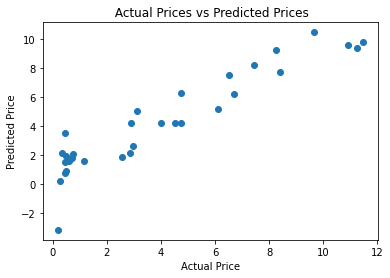

In [131]:
plt.scatter(Y_test, test_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()